In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import random
import librosa
import numpy as np

import matplotlib.pyplot as plt

from cnn_audio.preprocessing import plot_recording, extract_features, process_single_file
from cnn_audio.params import pr

In [89]:
seconds = pr['nsynth']['max_seconds']
hop_length = pr['librosa']['hop_length']
window_size = pr['librosa']['spec_windows']
calc_features = ['chroma', 'mfcc']

In [166]:
glob_pattern = 'mallet_*_*-[0-9][4-7][0-9]-*.wav'

In [167]:
audio_files_dir = Path('./data/nsynth-train/audio')
audio_files = list(audio_files_dir.glob(glob_pattern))

In [168]:
set([i.stem[:i.stem.find('_')] for i in audio_files])

{'mallet'}

In [169]:
# random.seed(42)
audio_file = random.choice(audio_files)
audio_file.stem

'mallet_acoustic_048-063-100'

In [170]:
audio_data, sr = librosa.load(audio_file, sr=None)

In [171]:
audio_data.shape

(64000,)

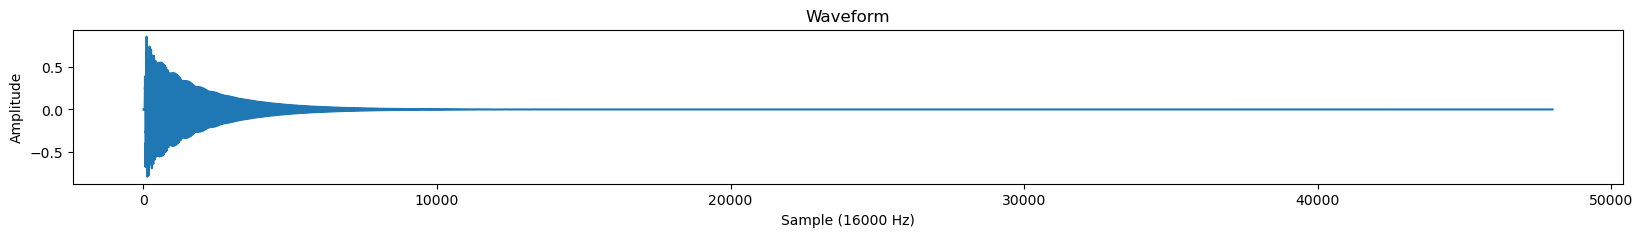

In [172]:
plot_recording(audio_data, sample_rate=sr, seconds=seconds)

In [173]:
audio_file_name, features = process_single_file(audio_file, seconds, window_size, hop_length, calc_features)
audio_file_name

'mallet_acoustic_048-063-100'

In [174]:
features['stft'].shape

(1025, 94)

[Text(0.5, 1.0, 'MFCC for mallet_acoustic_048-063-100')]

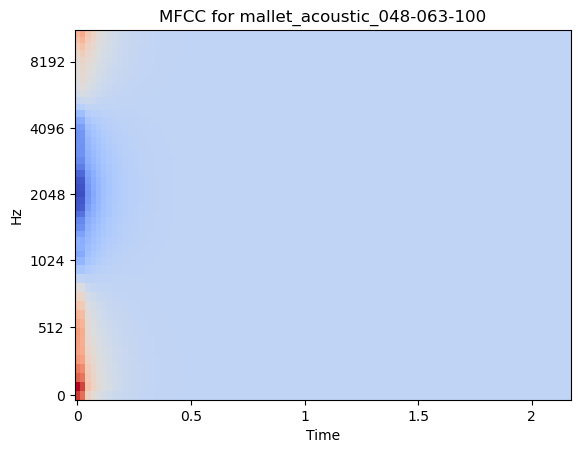

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

img2 = librosa.display.specshow(features['mfcc'], x_axis='time', y_axis='mel', ax=ax)
ax.set(title=f'MFCC for {audio_file_name}');


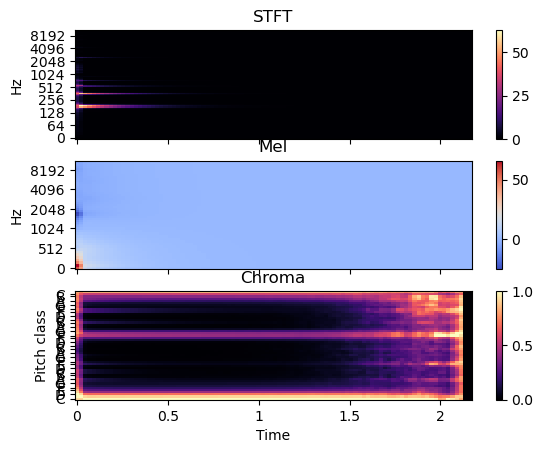

In [88]:

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)

img1 = librosa.display.specshow(features['stft'], x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT')

img2 = librosa.display.specshow(features['mfcc'], x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

img3 = librosa.display.specshow(
    features['chroma'], x_axis='time', y_axis='chroma', ax=ax[2]
)
ax[2].set(title='Chroma')

for ax_i in ax:
    ax_i.label_outer()

fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]]);
